In [ ]:
!nvidia-smi

Sun Oct  8 13:05:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Define the CNN model with more layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])



# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.4341 - accuracy: 0.8634 - val_loss: 0.0633 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1289 - accuracy: 0.9670 - val_loss: 0.0527 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0926 - accuracy: 0.9772 - val_loss: 0.0491 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0745 - accuracy: 0.9823 - val_loss: 0.0416 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0646 - accuracy: 0.9840 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9857 - val_loss: 0.0319 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9883 - val_loss: 0.0331 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


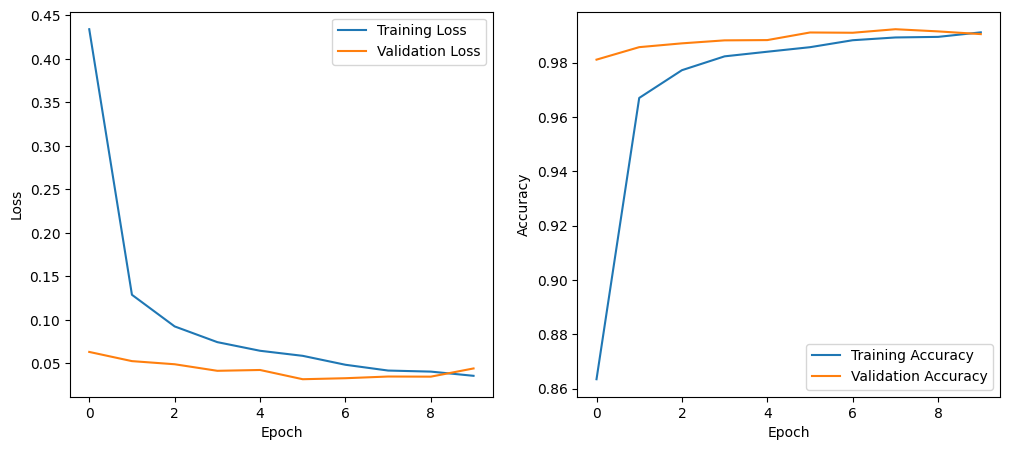

In [ ]:
# Train the model and collect the training history
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

model.save("my_cnn_model.h5")

# Plot the training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


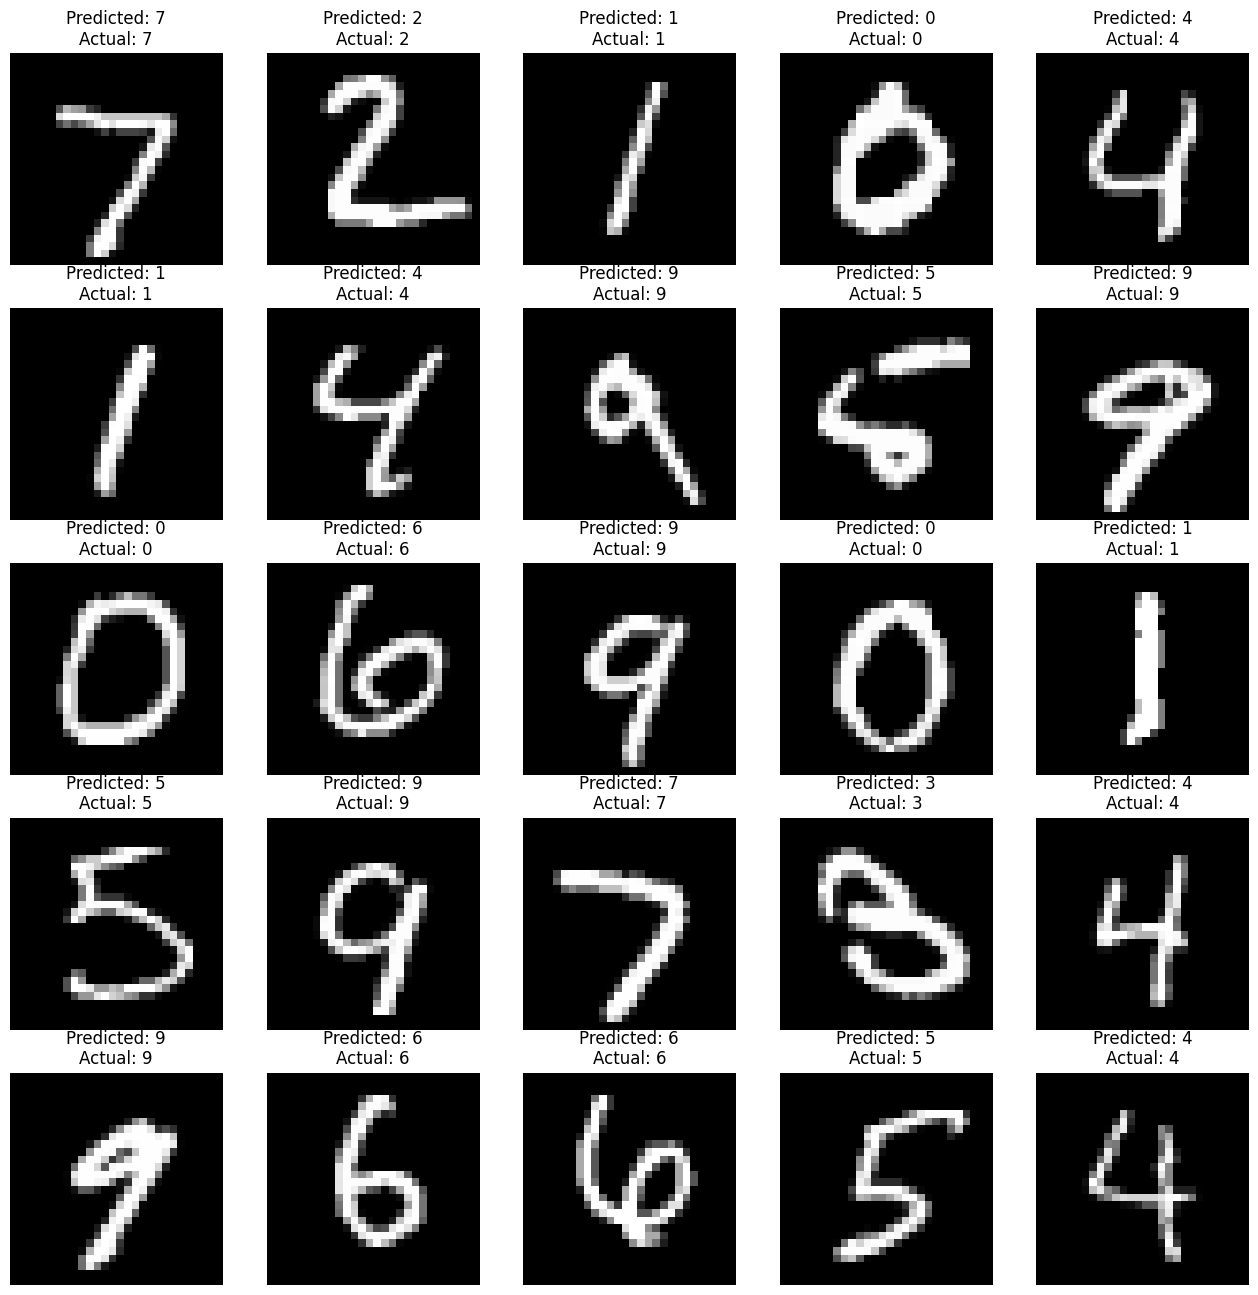

In [ ]:
# Make predictions on the test data
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Convert the raw predictions to class labels (0 to 9)
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions along with the actual labels
plt.figure(figsize=(16, 16))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}")
    plt.axis('off')

plt.show()